# Imports and understanding modules for vision

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

* `torchvision` - base domain library for PyTorch computer vision.
* `torchvision.datasets` - get datasets and data loading functions for computer vision.
* `torchvision.models` - already pretrained computer vision models.
* `torchvision.transforms` - functions for manipulating vision data.
* `torch.utils.data.Dataset` - Base dataset for PyTorch class.
* `torch.utils.data.DataLoader` - creates a python iterable over a dataset.

In [2]:
import torch
from torch import nn, optim

import torchvision 
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor
from torch.utils.data import Dataset, DataLoader

print(torch.__version__)
print(torchvision.__version__)

2.4.1+cu121
0.19.1+cu121


# Getting a dataset - fashion mnist

In [3]:
training_data = datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

100%|██████████| 26421880/26421880 [00:00<00:00, 113099676.86it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 4063378.28it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 62305635.79it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 7651409.28it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



# Understanding and Visualizing the data

In [4]:
len(training_data), len(test_data)

(60000, 10000)

In [5]:
image, label = training_data[0]
print(f"Image shape: {image.shape}")
print(f"Label: {label}")

Image shape: torch.Size([1, 28, 28])
Label: 9


In [6]:
classes = training_data.classes
print(f"Classes : {classes}")

Classes : ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [7]:
class_to_idx = training_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [8]:
image.shape

torch.Size([1, 28, 28])

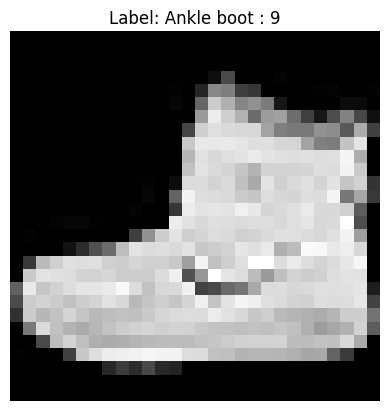

In [9]:
import matplotlib.pyplot as plt

image, label = training_data[0]  # Access the first sample
plt.imshow(image.squeeze(), cmap='gray')  # `squeeze` removes extra dimensions
plt.title(f"Label: {training_data.classes[label]} : {label}")
plt.axis('off')
plt.show()

In [10]:
class_names = training_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

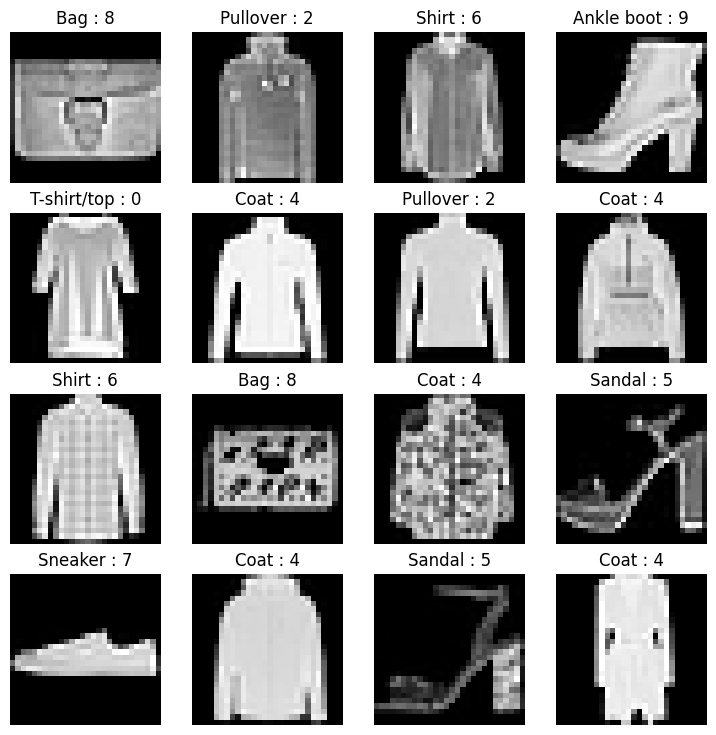

In [11]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
    random_idx = torch.randint(low=1, high=len(training_data), size=[1]).item()
    image, label = training_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(image.squeeze(), cmap='gray')
    plt.title(f"{class_names[label]} : {label}")
    plt.axis('off')

# Creating mini batches with DataLoader

In [12]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=training_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE, shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f34890023e0>,
 <torch.utils.data.dataloader.DataLoader at 0x7f3489002740>)

In [13]:
print(f"Train dataloader of batches : {len(train_dataloader)}, and test dataloader of batches : {len(test_dataloader)} both of {BATCH_SIZE} batch size")

Train dataloader of batches : 1875, and test dataloader of batches : 313 both of 32 batch size


In [14]:
next(iter(train_dataloader))

[tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           ...,
           [0.0000, 0.0000, 0.0000,  ..., 0.0157, 0.0000, 0.0039],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],
 
 
         [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           ...,
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],
 
 
         [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000

In [15]:
torch.rand(size=(32, 3, 28, 28))[0].squeeze().shape

torch.Size([3, 28, 28])

# Model 0 - Baseline

In [16]:
# Understanding Flatten Layer
a = nn.Flatten()(torch.rand(size=(1, 28, 28)))
a

tensor([[7.1236e-01, 7.8225e-01, 7.4347e-01, 4.5495e-01, 5.8398e-02, 3.8978e-01,
         4.3232e-01, 3.3745e-01, 4.3797e-01, 8.8830e-01, 2.2533e-01, 9.9094e-01,
         6.1553e-01, 2.2967e-01, 4.0640e-01, 1.4469e-01, 8.2801e-01, 2.3165e-01,
         2.2290e-01, 4.9603e-01, 1.2089e-01, 1.8356e-01, 6.3599e-01, 8.0906e-01,
         3.0347e-01, 8.3533e-01, 7.2600e-01, 7.6748e-01, 8.6084e-01, 2.0471e-01,
         2.4164e-01, 8.6283e-02, 8.8869e-01, 5.0778e-01, 2.2557e-01, 4.4372e-01,
         2.2702e-01, 8.6469e-01, 4.5961e-01, 1.8383e-01, 4.3895e-01, 4.5653e-01,
         4.6299e-01, 8.3691e-01, 7.9366e-01, 7.4824e-01, 8.6110e-01, 1.8233e-01,
         8.6514e-02, 3.0840e-01, 6.0573e-01, 4.0500e-01, 6.5134e-01, 3.3789e-01,
         3.4589e-01, 7.6561e-01, 5.3249e-01, 5.2132e-01, 8.4736e-01, 7.9586e-01,
         8.9498e-01, 9.1575e-01, 9.6555e-02, 2.9161e-01, 2.8621e-01, 7.7889e-01,
         9.2221e-01, 3.7379e-01, 9.3983e-03, 1.4943e-01, 2.3513e-02, 8.1151e-01,
         2.2096e-01, 6.7746e

In [17]:
a.shape

torch.Size([1, 784])

In [18]:
next(iter(train_dataloader))[0].shape, next(iter(train_dataloader))[1].shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [19]:
next(iter(train_dataloader))[0][31].shape    # 0 to 31 for 32 batch size

torch.Size([1, 28, 28])

In [20]:
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape:int, output_shape:int, hidden_units:int):
        super().__init__()
        self.linear_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x):
        return self.linear_stack(x)

In [21]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [22]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_0 = FashionMNISTModelV0(input_shape=784,    # This is 28*28 (input after Flatten)
                              output_shape=10, 
                              hidden_units=10)
model_0.to(device)

FashionMNISTModelV0(
  (linear_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [23]:
dummy_x = torch.rand(size=(1, 1, 28, 28)).to(device)
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [24]:
model_0.state_dict()

OrderedDict([('linear_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]],
                     device='cuda:0')),
             ('linear_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163], device='cuda:0')),
             ('linear_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      

In [25]:
from pathlib import Path
import requests

if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download....")
else:
    print("Downloading helper_functions.py")
    request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py')
    with open('helper_functions.py', 'wb') as file:
        file.write(request.content)

In [26]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(params=model_0.parameters(), lr=0.1)

In [27]:
# Testing on dummy input and output
accuracy_fn(torch.round(model_0(dummy_x).squeeze()), torch.round(torch.rand(size=(10,))).to(device))

40.0

In [28]:
# Setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [29]:
model_0.to(device)

FashionMNISTModelV0(
  (linear_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
# Use tqdm for progress bar
from tqdm import tqdm

torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 10

for epoch in range(epochs):
    model_0.train()  
    train_loss = 0  
    train_acc = 0
    
    with tqdm(train_dataloader, desc=f"Epoch {epoch + 1}/{epochs}", unit="batch") as progress_bar:
        for image_tensor, label in progress_bar:
            X_train = image_tensor.to(device)
            y_train = label.to(device)

            y_logits = model_0(X_train)
            y_preds = torch.argmax(torch.softmax(y_logits, dim=1), dim=1)
            
            loss = loss_fn(y_logits, y_train)
            acc = accuracy_fn(y_preds, y_train)
            
            train_loss += loss.item()
            train_acc += acc

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            progress_bar.set_postfix({"batch_loss": loss.item(), "batch_acc" : acc})
    
    # Calculate and print the average loss for the epoch
    avg_loss = train_loss / len(train_dataloader)
    avg_acc = train_acc / len(train_dataloader)
    print(f"Train Epoch {epoch + 1} completed. Average Loss: {avg_loss:.4f}. Average Acc : {avg_acc}")


    model_0.eval()
    with torch.inference_mode():
        test_loss = 0
        test_acc = 0

        with tqdm(test_dataloader, desc=f"Epoch {epoch + 1}/{epochs}", unit="batch") as progress_bar:
            for image_tensor, label in progress_bar:
                X_test = image_tensor.to(device)
                y_test = label.to(device)
    
                y_logits = model_0(X_test)
                y_preds = torch.argmax(torch.softmax(y_logits, dim=1), dim=1)
                
                loss = loss_fn(y_logits, y_test)
                acc = accuracy_fn(y_preds, y_test)

                test_loss += loss.item()
                test_acc += acc
                
                progress_bar.set_postfix({"batch_loss": loss.item(), "batch_acc" : acc})

            avg_loss = test_loss / len(test_dataloader)
            avg_acc = test_acc / len(test_dataloader)
            print(f"Test Epoch {epoch + 1} completed. Average Loss: {avg_loss:.4f}. Average Acc : {avg_acc}")


Epoch 1/10:  33%|███▎      | 611/1875 [00:03<00:07, 178.92batch/s, batch_loss=1.12, batch_acc=75]   

In [ ]:
model_0.state_dict()

In [ ]:
next(model_0.parameters()).device

# Non Linear model

In [ ]:
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape:int, output_shape:int, hidden_units:int):
        super().__init__()
        self.linear_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x):
        return self.linear_stack(x)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_1 = FashionMNISTModelV1(input_shape=784,    # This is 28*28 (input after Flatten)
                              output_shape=10, 
                              hidden_units=10)
model_1.to(device)

In [ ]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(params=model_1.parameters(), lr=0.1)

In [ ]:
# Use tqdm for progress bar
from tqdm import tqdm

torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 5

for epoch in range(epochs):
    model_1.train()  
    train_loss = 0  
    train_acc = 0
    
    with tqdm(train_dataloader, desc=f"Epoch {epoch + 1}/{epochs}", unit="batch") as progress_bar:
        for image_tensor, label in progress_bar:
            X_train = image_tensor.to(device)
            y_train = label.to(device)

            y_logits = model_1(X_train)
            y_preds = torch.argmax(torch.softmax(y_logits, dim=1), dim=1)
            
            loss = loss_fn(y_logits, y_train)
            acc = accuracy_fn(y_preds, y_train)
            
            train_loss += loss.item()
            train_acc += acc

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            progress_bar.set_postfix({"batch_loss": loss.item(), "batch_acc" : acc})
    
    # Calculate and print the average loss for the epoch
    avg_loss = train_loss / len(train_dataloader)
    avg_acc = train_acc / len(train_dataloader)
    print(f"Train Epoch {epoch + 1} completed. Average Loss: {avg_loss:.4f}. Average Acc : {avg_acc}")


    model_1.eval()
    with torch.inference_mode():
        test_loss = 0
        test_acc = 0

        with tqdm(test_dataloader, desc=f"Epoch {epoch + 1}/{epochs}", unit="batch") as progress_bar:
            for image_tensor, label in progress_bar:
                X_test = image_tensor.to(device)
                y_test = label.to(device)
    
                y_logits = model_1(X_test)
                y_preds = torch.argmax(torch.softmax(y_logits, dim=1), dim=1)
                
                loss = loss_fn(y_logits, y_test)
                acc = accuracy_fn(y_preds, y_test)

                test_loss += loss.item()
                test_acc += acc
                
                progress_bar.set_postfix({"batch_loss": loss.item(), "batch_acc" : acc})

            avg_loss = test_loss / len(test_dataloader)
            avg_acc = test_acc / len(test_dataloader)
            print(f"Test Epoch {epoch + 1} completed. Average Loss: {avg_loss:.4f}. Average Acc : {avg_acc}")


# Random Stuff to clarify my doubts

---

In [ ]:
# # For linear model
# # Use tqdm for progress bar
# from tqdm import tqdm

# torch.manual_seed(42)
# torch.cuda.manual_seed(42)

# epochs = 3

# for epoch in range(epochs):
#     model_0.train()
#     train_loss = 0
#     progress_bar = tqdm(train_dataloader, desc=f"Epoch {epoch + 1}/{epochs}")
    
#     for image_tensor, label in progress_bar:
#         X_train = image_tensor.to(device)
#         y_train = label.to(device)

#         y_logits = model_0(X_train)
#         loss = loss_fn(y_logits, y_train)
#         train_loss += loss.item()

#         progress_bar.set_postfix(loss=loss.item())

#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

#     avg_loss = train_loss / len(train_dataloader)
#     print(f"Epoch {epoch + 1} completed. Loss: {avg_loss}")

In [ ]:
torch.manual_seed(42)
(torch.softmax(torch.rand(10,1), dim=0)).argmax()

In [ ]:
model_0(X_train).shape

In [ ]:
y_logits.squeeze().shape

In [ ]:
torch.argmax(torch.softmax(y_logits, dim=1), dim=1)

In [ ]:
y_train

In [ ]:
# accuracy_fn(torch.argmax(torch.softmax(y_logits, dim=1), dim=1), y_train)

---

# Model 2 - Building a convolutional neural network

https://poloclub.github.io/cnn-explainer/

In [1]:
import torch
from torch import nn, optim
import torchvision
from torchvision import datasets

from tqdm import tqdm

import matplotlib.pyplot as plt

In [2]:
training_data = datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

100%|██████████| 26421880/26421880 [00:01<00:00, 13315217.52it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 207366.13it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3904978.44it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 3240137.60it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=training_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE, shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7bc56e4afaf0>,
 <torch.utils.data.dataloader.DataLoader at 0x7bc56e4afeb0>)

In [4]:
class FashionMNISTModelV2(nn.Module):
    '''
    Model Architechure that replicates the TinyVGG Model.
    '''
    def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=(3, 3),
                      stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=(3, 3),
                      stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=1)
        )
        

        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=(3, 3),
                      stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=(3, 3),
                      stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=1)
        )
        

        self.classifier  = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*26*26,
                      out_features=output_shape)
        )

    def forward(self, x):
        return self.classifier(self.conv_block_2(self.conv_block_1(x)))
        ## Debug
        # x = self.conv_block_1(x)
        # print(x.shape, x.squeeze(0)[0].unsqueeze(0).permute(1, 2, 0).detach().numpy().shape)
        # plt.imshow(x.squeeze(0)[0].unsqueeze(0).permute(1, 2, 0).detach().numpy())
        # plt.show()
        # x = self.conv_block_2(x)
        # print(x.shape)
        # plt.imshow(x.squeeze(0)[0].unsqueeze(0).permute(1, 2, 0).detach().numpy())
        # plt.show()
        # x = self.classifier(x)
        # print(x.shape)
        # return x

In [5]:
torch.manual_seed(42)
dummy_image = torch.rand(size=(1, 1, 28, 28))
model_new = FashionMNISTModelV2(input_shape=1, hidden_units=5, output_shape=10)

model_new(torch.softmax(dummy_image, dim=1))

tensor([[-0.0234, -0.0500,  0.0279, -0.0065,  0.0053,  0.0174,  0.0736, -0.0336,
          0.0180,  0.0129]], grad_fn=<AddmmBackward0>)

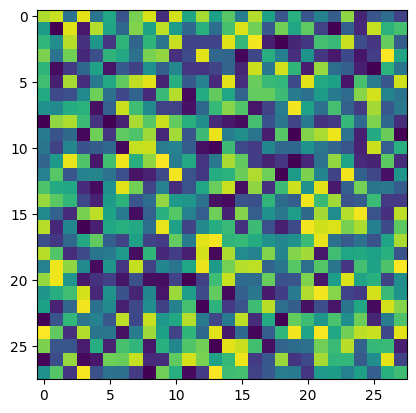

In [6]:
plt.imshow(dummy_image.squeeze(0).permute(1, 2, 0));

In [7]:
nn.MaxPool2d(kernel_size=2, stride=1)(dummy_image).squeeze(0).shape

torch.Size([1, 27, 27])

In [8]:
nn.MaxPool2d(kernel_size=2, stride=1)(dummy_image).shape

torch.Size([1, 1, 27, 27])

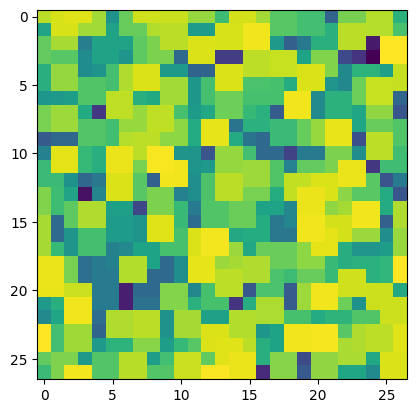

In [9]:
plt.imshow(nn.MaxPool2d(kernel_size=2, stride=1)(dummy_image).squeeze(0).permute(1, 2, 0));

In [10]:
torch.rand(size=(1, 2, 1, 3)).squeeze(2).shape

torch.Size([1, 2, 3])

In [11]:
# Setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [12]:
# Real model for training
model_2 = FashionMNISTModelV2(input_shape=1, 
                              hidden_units=20, 
                              output_shape=len(training_data.classes))
model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=13520, out_features=10, bias=True)
  )
)

In [13]:
len(training_data.classes)

10

In [14]:
from pathlib import Path
import requests

if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download....")
else:
    print("Downloading helper_functions.py")
    request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py')
    with open('helper_functions.py', 'wb') as file:
        file.write(request.content)

In [15]:
# Loss function and optimizer
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(params=model_2.parameters(), lr=1e-3)

In [16]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 1.9568e-01,  3.2730e-01, -2.8388e-01],
                        [ 6.9065e-03, -8.4705e-02,  3.0578e-01],
                        [ 4.0174e-02,  1.6008e-02,  3.2086e-01]]],
              
              
                      [[[ 3.4606e-02,  3.0879e-04, -3.1978e-01],
                        [ 1.3821e-01,  2.4921e-01,  2.4121e-01],
                        [ 3.2827e-01, -7.6769e-02, -1.0014e-01]]],
              
              
                      [[[ 2.4833e-01,  2.9994e-01,  1.9518e-01],
                        [-1.7196e-01,  3.1389e-01,  1.4956e-01],
                        [ 9.6906e-02,  2.5035e-01, -4.0552e-02]]],
              
              
                      [[[ 5.4356e-02, -1.0446e-01, -3.3295e-02],
                        [-2.7078e-01, -1.8163e-01, -2.4468e-01],
                        [ 2.8617e-01, -1.0386e-01, -2.7945e-02]]],
              
              
                      [[[ 2.3487e-01,  1.7891e-01, -2

In [17]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 5

for epoch in range(epochs):
    model_2.train()
    
    train_running_loss = 0
    train_running_acc = 0
    
    with tqdm(train_dataloader, desc=f"Epoch {epoch + 1}/{epochs}", unit="batch") as progress_bar:
        for image_tensor, label in progress_bar:
            X_train = image_tensor.to(device)
            y_train = label.to(device)

            y_logits = model_2(X_train)
            # print(y_logits)
            y_preds = torch.argmax(y_logits, dim=1)
            # print(y_preds)

            loss = loss_fn(y_logits, y_train)
            # print(loss)
            acc = accuracy_fn(y_preds, y_train)
            # print(acc)

            train_running_loss += loss.item()
            train_running_acc += acc

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            progress_bar.set_postfix({'Batch Loss' : loss.item(), 'Batch Acc' : acc})
            # break
        
    avg_train_loss = train_running_loss / len(train_dataloader)
    avg_train_acc = train_running_acc / len(train_dataloader)
    print(f"Epoch {epoch + 1} completed | Average Train Loss : {avg_train_loss} | Average Train Acc : {avg_train_acc}")


    model_2.eval()
    test_running_loss = 0
    test_running_acc = 0
    with torch.inference_mode():
        with tqdm(test_dataloader, desc=f"Epoch {epoch + 1}/{epochs}", unit="batch") as progress_bar:
            for image_tensor, label in progress_bar:
                X_test = image_tensor.to(device)
                y_test = label.to(device)
    
                y_logits = model_2(X_test)
                # print(y_logits)
                y_preds = torch.argmax(y_logits, dim=1)
                # print(y_preds)
    
                loss = loss_fn(y_logits, y_test)
                # print(loss)
                acc = accuracy_fn(y_preds, y_test)
                # print(acc)
    
                test_running_loss += loss.item()
                test_running_acc += acc
    
                progress_bar.set_postfix({'Batch Loss' : loss.item(), 'Batch Acc' : acc})
                # break
        
        avg_test_loss = test_running_loss / len(test_dataloader)
        avg_test_acc = test_running_acc / len(test_dataloader)
        print(f"Epoch {epoch + 1} completed | Average Test Loss : {avg_test_loss} | Average Test Acc : {avg_test_acc}")
            

Epoch 1/5: 100%|██████████| 1875/1875 [01:39<00:00, 18.77batch/s, Batch Loss=0.654, Batch Acc=81.2]


Epoch 1 completed | Average Train Loss : 1.16961039036115 | Average Train Acc : 60.723333333333336


Epoch 1/5: 100%|██████████| 313/313 [00:09<00:00, 33.98batch/s, Batch Loss=0.384, Batch Acc=93.8]


Epoch 1 completed | Average Test Loss : 0.6725813105654793 | Average Test Acc : 76.04832268370608


Epoch 2/5: 100%|██████████| 1875/1875 [01:38<00:00, 18.99batch/s, Batch Loss=0.562, Batch Acc=81.2]


Epoch 2 completed | Average Train Loss : 0.64440881690979 | Average Train Acc : 77.11166666666666


Epoch 2/5: 100%|██████████| 313/313 [00:08<00:00, 36.20batch/s, Batch Loss=0.335, Batch Acc=87.5]


Epoch 2 completed | Average Test Loss : 0.6191217169022789 | Average Test Acc : 76.35782747603834


Epoch 3/5: 100%|██████████| 1875/1875 [01:38<00:00, 19.09batch/s, Batch Loss=0.442, Batch Acc=81.2]


Epoch 3 completed | Average Train Loss : 0.5730132462501526 | Average Train Acc : 79.465


Epoch 3/5: 100%|██████████| 313/313 [00:08<00:00, 36.72batch/s, Batch Loss=0.322, Batch Acc=93.8]


Epoch 3 completed | Average Test Loss : 0.5632542552658544 | Average Test Acc : 80.03194888178913


Epoch 4/5: 100%|██████████| 1875/1875 [01:42<00:00, 18.29batch/s, Batch Loss=0.743, Batch Acc=84.4]


Epoch 4 completed | Average Train Loss : 0.5304438075701395 | Average Train Acc : 81.0


Epoch 4/5: 100%|██████████| 313/313 [00:09<00:00, 34.13batch/s, Batch Loss=0.251, Batch Acc=87.5]


Epoch 4 completed | Average Test Loss : 0.5211337809078991 | Average Test Acc : 81.10023961661342


Epoch 5/5: 100%|██████████| 1875/1875 [01:39<00:00, 18.84batch/s, Batch Loss=0.507, Batch Acc=78.1]


Epoch 5 completed | Average Train Loss : 0.5002649734417598 | Average Train Acc : 82.11166666666666


Epoch 5/5: 100%|██████████| 313/313 [00:08<00:00, 36.28batch/s, Batch Loss=0.281, Batch Acc=87.5]

Epoch 5 completed | Average Test Loss : 0.504550346646446 | Average Test Acc : 82.12859424920129


In [18]:
def make_predictions(model:torch.nn.Module, data:list, device:torch.device):
    pred_probs = []
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            sample = torch.unsqueeze(sample, dim=0).to(device)
            pred_logit = model(sample)
            pred_prob = (torch.softmax(pred_logit.squeeze(), dim=0))
            pred_probs.append(pred_prob.cpu())

    return torch.stack(pred_probs)

In [19]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

import random
random.seed(42)

test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

test_samples[0].shape

torch.Size([1, 28, 28])

In [20]:
test_labels[0]

5

In [21]:
classes = { 0 : 'T-shirt/top',
            1 : 'Trouser',
            2 : 'Pullover',
            3 : 'Dress',
            4 : 'Coat',
            5 : 'Sandal',
            6 : 'Shirt',
            7 : 'Sneaker',
            8 : 'Bag',
            9 : 'Ankle boot',
}

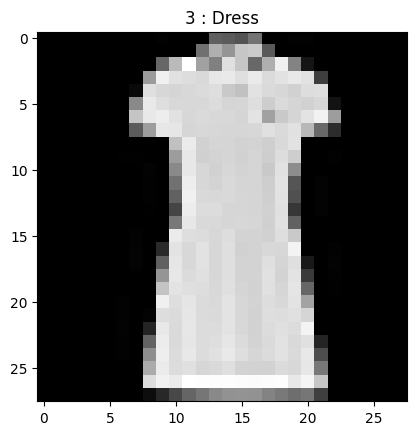

In [22]:
plt.imshow(test_samples[4].squeeze(), cmap='gray')
plt.title(f"{test_labels[4]} : {classes[test_labels[4]]}");

# Make predictions

In [23]:
pred_probs = make_predictions(model_2, test_samples, device)

pred_probs[:2], pred_probs.shape

(tensor([[1.7931e-06, 2.4239e-07, 5.5599e-07, 3.8518e-07, 2.0667e-06, 7.4147e-01,
          6.0388e-06, 3.1084e-03, 4.6138e-04, 2.5495e-01],
         [5.1097e-02, 8.0158e-02, 1.6462e-03, 8.0175e-01, 2.1554e-02, 6.3131e-07,
          4.3256e-02, 2.5413e-05, 5.0993e-04, 1.7673e-06]]),
 torch.Size([9, 10]))

In [24]:
pred_classes = torch.argmax(pred_probs, dim=1)
pred_classes

tensor([5, 3, 7, 4, 3, 0, 4, 7, 1])

In [25]:
test_labels

[5, 1, 7, 4, 3, 0, 4, 7, 1]

# Making predictions on whole dataset

In [26]:
from tqdm.auto import tqdm


y_preds = []
model_2.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc="Making predictions...."):
        X, y = X.to(device), y.to(device)
        y_logit = model_2(X)
        y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
        y_preds.append(y_pred)

# print(y_preds[:10])
y_pred_tensor = torch.cat(y_preds)
print(y_pred_tensor)
print(len(y_pred_tensor))

Making predictions....:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 8, 3, 8])
10000


----

# ML Extensions and Metrics

In [27]:
import torchmetrics
import mlxtend
print(f"Torchmetrics version : {torchmetrics.__version__}, MLXTEND version : {mlxtend.__version__}")

Torchmetrics version : 1.6.0, MLXTEND version : 0.23.1


In [28]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

In [31]:
class_names = training_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

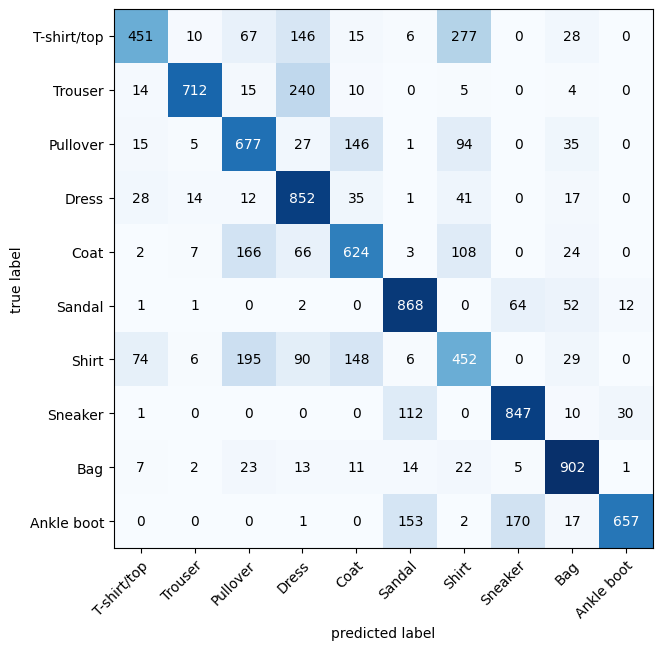

In [36]:
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor, target=test_data.targets)

fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10, 7)
)

In [34]:
len(test_data.targets), test_data.targets

(10000, tensor([9, 2, 1,  ..., 8, 1, 5]))

# Save and Load best performing model

In [37]:
from pathlib import Path
MODEL_PATH = Path("Models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

PosixPath('Models/03_pytorch_computer_vision_model_2.pth')

In [38]:
print(f"Saving model to {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(), f=MODEL_SAVE_PATH)

Saving model to Models/03_pytorch_computer_vision_model_2.pth


In [41]:
# Create new instance
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(input_shape=1, hidden_units=20, output_shape=len(class_names))

In [42]:
# Load in the save state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<ipython-input-42-980d0cc7ce4f>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [43]:
loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=13520, out_features=10, bias=True)
  )
)

In [44]:
# Gives same result as prev (saved)